In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
#下载MNIST数据, 28*28像素的图片
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
x, y = mnist['data'], mnist['target']
x.shape

(70000L, 784L)

In [4]:
y.shape

(70000L,)

In [5]:
28*28

784

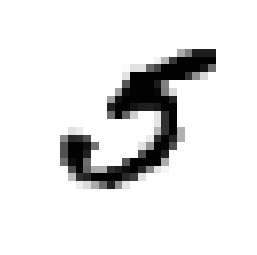

In [6]:
some_digit = x[36000]
somg_digit_image = some_digit.reshape(28,28)

#显示图片
plt.imshow(somg_digit_image, cmap = matplotlib.cm.binary,
          interpolation='nearest')
#不显示坐标轴
plt.axis("off")
plt.show()

In [7]:
y[36000]

5.0

In [66]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.binary,
              interpolation='nearest')
    plt.axis("off")

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

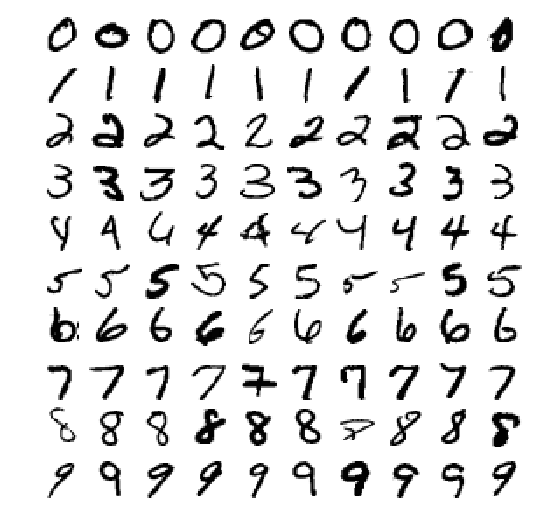

In [10]:
plt.figure(figsize=(9,9))
example_image = np.r_[x[:12000:600], x[13000:30600:600],x[30600:60000:590]]
plot_digits(example_image)
plt.show()

In [11]:
x[:12000:600].shape

(20L, 784L)

In [12]:
x[13000:30600:600].shape


(30L, 784L)

In [13]:
x[30600:60000:590].shape

(50L, 784L)

In [14]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[:60000]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [15]:
#训练二分类器，识别数字是不是5

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)


In [16]:
type(y_train_5)

numpy.ndarray

In [17]:
#随机梯度下降分类器 SGD
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

d:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
#验证效果
sgd_clf.predict([some_digit])

array([ True])

In [19]:
#类似交叉验证
#StratifiedKFold类实现了分层采样
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    
    

0.9502
0.96565
0.96495


In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, scoring='accuracy')

array([0.9502 , 0.96565, 0.96495])

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x),1),dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

In [23]:
#混淆矩阵
#cross_val_predict像 cross_val_score()，cross_val_predict()也使用 K 折交叉验证。它不是返回一个评估分数，而是返回基于每一个测试折做出的一个预测值。
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [24]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [25]:
#准确率和召回率
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [26]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [27]:
# 计算f1值

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [28]:
#自定义设置 决策阈值,使用decision_function()函数
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 200000
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                            method = 'decision_function')

In [31]:
from sklearn.metrics import precision_recall_curve
#precision_recall_curve(),你都可以计算准确率和召回率:

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


In [32]:
print(precisions, recalls, thresholds)

[0.09080706 0.09079183 0.09079335 ... 1.         1.         1.        ] [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00] [-1613405.71147769 -1612415.64410228 -1611701.37464018 ...
   954170.04762499   987947.69103863  1002862.09359785]


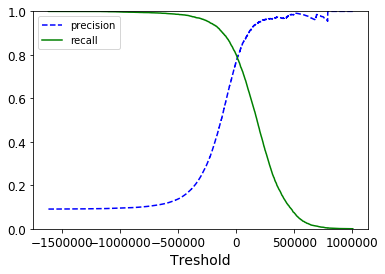

In [33]:
#使用 Matplotlib 画出准确率和召回率

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label='precision')
    plt.plot(thresholds, recalls[:-1], "g-", label='recall')
    plt.xlabel('Treshold')
    plt.legend()
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

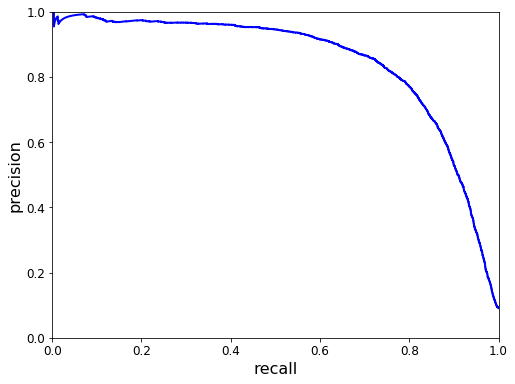

In [34]:
#画图准确率和召回率
def plot_precision_vs_recall(precision, recalls):
    plt.plot(recalls, precision, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

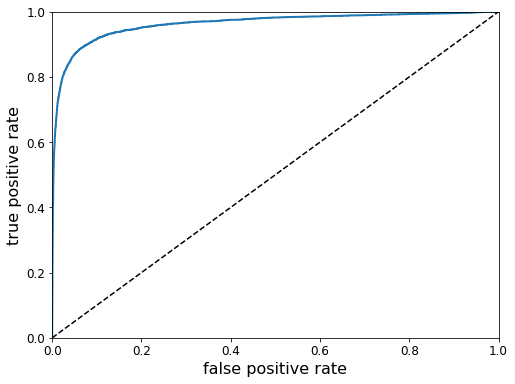

In [35]:
#roc 曲线

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("false positive rate", fontsize=16)
    plt.ylabel("true positive rate", fontsize=16)
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967155

In [37]:
#因为 ROC 曲线跟准确率/召回率曲线（或者叫 PR）很类似，你或许会好奇如何决定使用哪一个曲线呢？一个笨拙的规则是，优先使用 PR 曲线当正例很少，或者当你关注假正例多于假反例的时候。其他情况使用 ROC 曲线。

In [38]:
#训练随机森林，作比较
#RandomForestClassifier不提供decision_function()方法，
#但是提供了predict_proba()方法：返回一个数组，数组每一行表示一个样例，每一列表示一个类，
#意思是给定一个样本属于给定类的概率。

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                   method='predict_proba')

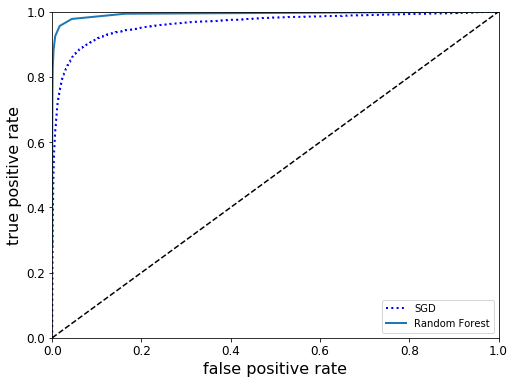

In [39]:
#roc曲线，需要样例的分数，不是概率
#使用正例的概率当做样例的分数
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend()
plt.show()

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [41]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train_5,cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [42]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

In [43]:
#多分类
#对于严格二分类的分类器， svm分类器，使用ovo策略实现多分类
#其他使用ova策略实现多分类
#训练算法，做多分类
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [44]:
sgd_clf.predict([some_digit])

array([5.])

In [45]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [46]:
np.argmax(some_digit_scores)

5

In [47]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [48]:
#一个分类器被训练好了之后，它会保存目标类别列表到它的属性classes_中，按值排序
sgd_clf.classes_[5]

5.0

In [49]:
#如果想强制使用ovo策略或是ova策略，可以使用oneVsOneClassifier类或是OneVsRestClassifier类
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [50]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [51]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [52]:
#评估模型精度
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.84063187, 0.84899245, 0.86652998])

In [53]:
#正则化提高精度
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [54]:
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

In [55]:
#误差分析
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

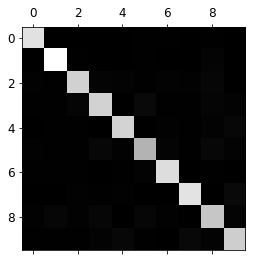

In [56]:
#将混淆矩阵以图像的形式呈现
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

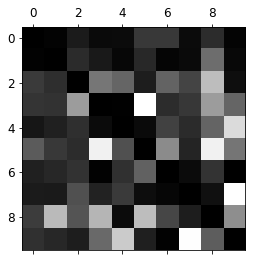

In [57]:
#比较错误率
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#用 0 来填充对角线
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#下图中行表示实际类别，列表示预测类别

In [58]:
#多标签分类，分类器给一个样本输出多个类别
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 == 1)
#y_multilabel数组，里面包含两个目标标签,
#第一个标签指出这个数字是否为大数字（7，8 或者 9），
#第二个标签指出这个数字是否是奇数。
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
#评估一个多标签分类器，和选择正确的量度标准，这取决于你的项目。
#举个例子，一个方法是对每个个体标签去量度 F1 值（或者前面讨论过的其他任意的二分类器的量度标准），然后计算平均值

y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
#average='macro'样本权重相同
f1_score(y_train, y_train_knn_pred, average='macro')

In [ ]:
#average='weighted'表示给每一个标签的权重等于它的支持度
f1_score(y_train, y_train_knn_pred, average='weighted')

In [62]:
#多输出分类
#每一个标签可以是多类别，比如它可以有多余两个可能值。

#给图片的像素强度添加早声
noise_train = np.random.randint(1, 100, (len(x_train), 784))
x_train_mod = x_train + noise_train
noise_test = np.random.randint(1, 100, (len(x_test), 784))
x_test_mod = x_test + noise_test
y_train_mod = x_train
y_test_mod = x_test

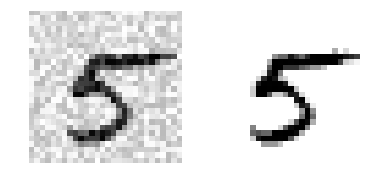

In [67]:
some_index = 5500
plt.subplot(121)
plot_digit(x_test_mod[some_index])
plt.subplot(122)
plot_digit(y_test_mod[some_index])
plt.show()

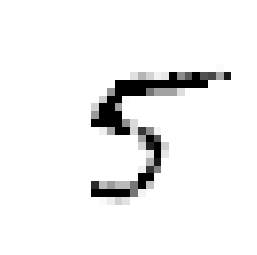

In [68]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)

In [ ]:
#网格搜索，调参knn

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors':[3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
